In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

import seaborn as sns
import warnings

# **Twitter**

# *KNN Vecinos*

In [100]:
df = pd.read_csv("Twitter.csv")

In [101]:
characteristics = ['dia_mas_publica', 'perfil_privado', 'cantidad_seguidores']
X = df.filter(items=characteristics).copy()

In [102]:
classColumn = ['clase']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

Precisión del clasificador KNN: 0.8426966292134831


<Axes: >

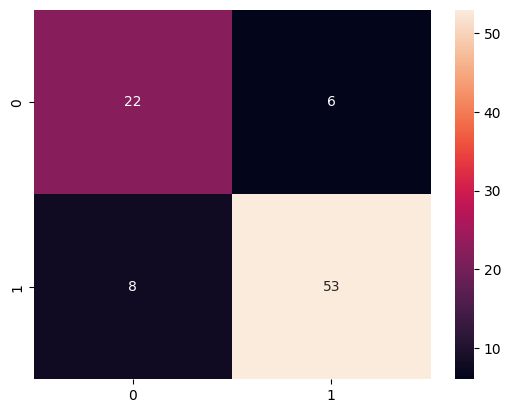

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.73      0.79      0.76        28
        Real       0.90      0.87      0.88        61

    accuracy                           0.84        89
   macro avg       0.82      0.83      0.82        89
weighted avg       0.85      0.84      0.84        89



# *Bayes Ingenuo*

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

Precisión del clasificador Bayes Ingenuo: 0.8539325842696629


<Axes: >

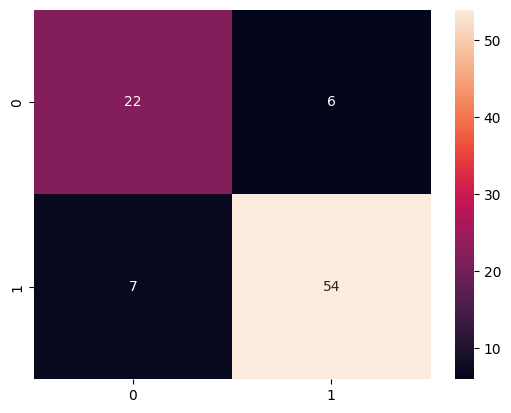

In [39]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

        Fake       0.76      0.79      0.77        28
        Real       0.90      0.89      0.89        61

    accuracy                           0.85        89
   macro avg       0.83      0.84      0.83        89
weighted avg       0.86      0.85      0.85        89



# *K-fold*

In [41]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

        Fake       0.58      0.58      0.58        12
        Real       0.89      0.89      0.89        47

    accuracy                           0.83        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.83      0.83      0.83        59

Precisión del clasificador KNN: 0.8305084745762712
              precision    recall  f1-score   support

        Fake       0.83      0.68      0.75        22
        Real       0.83      0.92      0.87        37

    accuracy                           0.83        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.83      0.83      0.83        59

Precisión del clasificador KNN: 0.8305084745762712
              precision    recall  f1-score   support

        Fake       0.80      0.50      0.62        16
        Real       0.84      0.95      0.89        43

    accuracy                           0.83        59
   macro avg       0.82   

In [42]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

235 59
              precision    recall  f1-score   support

        Fake       0.50      0.67      0.57        12
        Real       0.91      0.83      0.87        47

    accuracy                           0.80        59
   macro avg       0.70      0.75      0.72        59
weighted avg       0.82      0.80      0.81        59

Precisión del clasificador Bayes Ingenuo: 0.7966101694915254
235 59
              precision    recall  f1-score   support

        Fake       0.78      0.64      0.70        22
        Real       0.80      0.89      0.85        37

    accuracy                           0.80        59
   macro avg       0.79      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59

Precisión del clasificador Bayes Ingenuo: 0.7966101694915254
235 59
              precision    recall  f1-score   support

        Fake       0.69      0.56      0.62        16
        Real       0.85      0.91      0.88        43

    accuracy                           

# **Facebook**

# *KNN Vecinos*

In [43]:
df = pd.read_csv("Facebook.csv")
df.head()

,Unnamed: 0,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue,Clase
0,0,corto,Sí,medio,fin de semana,pocas,T
1,1,medio,Sí,medio,fin de semana,pocas,T
2,2,medio,Sí,medio,fin de semana,pocas,T
3,3,corto,Sí,medio,fin de semana,pocas,T
4,4,corto,Sí,medio,media semana,pocas,T


In [44]:
characteristics = ['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']
X = df.filter(items=characteristics).copy()

In [45]:
classColumn = ['Clase']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

print(X_train.shape[0], X_test.shape[0])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

252 109
Precisión del clasificador KNN: 0.8348623853211009


<Axes: >

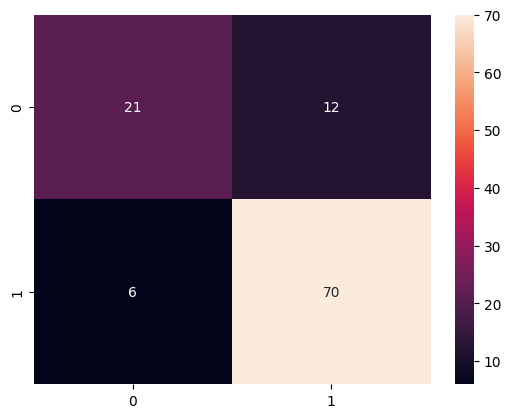

In [46]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.78      0.64      0.70        33
           T       0.85      0.92      0.89        76

    accuracy                           0.83       109
   macro avg       0.82      0.78      0.79       109
weighted avg       0.83      0.83      0.83       109



# *Bayes Ingenuo*

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

print(X_train2.shape[0], X_test2.shape[0])

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

216 145
Precisión del clasificador Bayes Ingenuo: 0.7655172413793103


<Axes: >

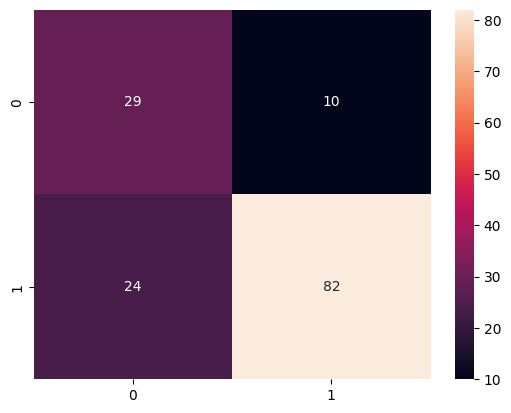

In [49]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           F       0.55      0.74      0.63        39
           T       0.89      0.77      0.83       106

    accuracy                           0.77       145
   macro avg       0.72      0.76      0.73       145
weighted avg       0.80      0.77      0.78       145



# *K-fold*

In [51]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

           F       0.00      0.00      0.00        16
           T       0.77      0.95      0.85        57

    accuracy                           0.74        73
   macro avg       0.39      0.47      0.43        73
weighted avg       0.60      0.74      0.66        73

Precisión del clasificador KNN: 0.7397260273972602
              precision    recall  f1-score   support

           F       0.45      0.39      0.42        23
           T       0.73      0.78      0.75        49

    accuracy                           0.65        72
   macro avg       0.59      0.58      0.59        72
weighted avg       0.64      0.65      0.65        72

Precisión del clasificador KNN: 0.6527777777777778
              precision    recall  f1-score   support

           F       0.25      0.28      0.26        18
           T       0.75      0.72      0.74        54

    accuracy                           0.61        72
   macro avg       0.50   

In [52]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

288 73
              precision    recall  f1-score   support

           F       0.41      0.69      0.51        16
           T       0.89      0.72      0.80        57

    accuracy                           0.71        73
   macro avg       0.65      0.70      0.65        73
weighted avg       0.79      0.71      0.73        73

Precisión del clasificador Bayes Ingenuo: 0.7123287671232876
289 72
              precision    recall  f1-score   support

           F       0.50      0.35      0.41        23
           T       0.73      0.84      0.78        49

    accuracy                           0.68        72
   macro avg       0.62      0.59      0.60        72
weighted avg       0.66      0.68      0.66        72

Precisión del clasificador Bayes Ingenuo: 0.6805555555555556
289 72
              precision    recall  f1-score   support

           F       0.52      0.72      0.60        18
           T       0.89      0.78      0.83        54

    accuracy                           

# **Perfiles**

In [85]:
df = pd.read_csv("ReconocimientoPerfiles.csv")
df.head()

,Unnamed: 0,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,...,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento
0,0,señor,Masculino,Madre,No,No,bueno,Sí,Sí,No,...,No,No,No,baja,nunca,nunca,<1,No,0,1-3
1,1,joven,Masculino,Madre,Sí,No,bueno,No,Sí,Sí,...,Sí,Sí,Sí,media,casi-nunca,a veces,>2,Sí,>3,1-3
2,2,joven,Masculino,Padre,Sí,No,regular,No,Sí,Sí,...,Sí,No,Sí,baja,casi-nunca,casi-nunca,1-2,Sí,1-3,1-3
3,3,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,...,No,Sí,Sí,baja,a veces,regularmente,1-2,No,0,1-3
4,4,joven,Masculino,Madre,Sí,No,regular,No,No,No,...,Sí,No,No,baja,nunca,casi-nunca,1-2,Sí,>3,>3


In [86]:
cantidad_elementos = df['Promedio-Primer-Semestre'].value_counts()
print(cantidad_elementos)
df = df.drop(columns=['Unnamed: 0'])

bueno      68
regular    67
malo        7
Name: Promedio-Primer-Semestre, dtype: int64


In [87]:
headers = df.columns
print(headers)


Index(['Edad', 'Genero', 'Tutor', 'Vive-con-Familia', 'Enfermedad-CrÃ³nica',
       'Promedio-Preparatoria', 'Materias-Relacionadas',
       'Carrera-Elegida-Ajusta-A-Gustos-Habilidades',
       'Buena-RelaciÃ³n-Familiar', 'Buena-RelaciÃ³n-Amigos-CompaÃ±eros',
       'Materias-Cursadas-Primer-Semestre', 'Promedio-Primer-Semestre',
       'Materias-Aprobadas-Primer-Semestre',
       'Materias-Reprobadas-De-ComputaciÃ³n',
       'Materias-Reprobadas-De-MatemÃ¡ticas',
       'Materias-Reprobadas-De-Ciensias-Sociales',
       'Horas-Promedio-Estudio-Examenes',
       'Horas-Promedio-Estudio-Actividades-Escolares',
       'Cursos-Extra-Primer-Semestre', 'Noviazgo',
       'Actividad-Cultural-o-Deportiva', 'Tiempo-con-sus-amigos-compaÃ±eros',
       'Horas-Semana-Divertirse con-sus-amigos',
       'ConsumÃ­a-Alcohol-Entre-semana', 'ConsumÃ­a-Alcohol-Fin-semana',
       'Horas-DÃ­a-Dedicada-Redes-Sociales', 'Gustan-Videojuegos',
       'Horas-Semana-Dedicada-Videojuegos',
       'Horas-Semana

In [118]:
df = pd.read_csv("Twitter.csv")

df = df.drop(columns=['Unnamed: 0'])
df = df.loc[:, ~df.columns.str.contains('^nombre')]
df.tail()


,cantidad_caracteres_nombre,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones,clase
289,medio,Sí,bajo,bajo,bajo,no,Fin de semana,no,Fake
290,medio,Sí,bajo,bajo,bajo,no,Fin de semana,no,Fake
291,largo,Sí,bajo,bajo,bajo,no,Media semana,no,Fake
292,largo,Sí,medio,alto,bajo,no,Fin de semana,no,Fake
293,medio,Sí,medio,medio,bajo,no,Media semana,no,Fake


In [119]:
headers = df.columns
print(headers)

Index(['cantidad_caracteres_nombre', 'tiene_foto_perfil',
       'cantidad_seguidores', 'cantidad_seguidos', 'promedio_publicaciones',
       'perfil_privado', 'dia_mas_publica', 'comenta_publicaciones', 'clase'],
      dtype='object')


In [120]:
#Dropear Carrera
import warnings
warnings.filterwarnings('ignore')




best_accuracy = 0
best_characteristics = []
best_model = []
best_cm = []

for header1 in headers:
    for header2 in headers:
        for header3 in headers:
            if((header1 != header2) and (header1 != header3) and (header2 != header3) and (header1 != 'clase') and (header2 != 'clase') and (header3 != 'clase')):
                characteristics = [header1, header2, header3]
                print(characteristics)
                X = df.filter(items=characteristics).copy()
                classColumn = ['clase']
                y = df.filter(items=classColumn).copy()

                encoder = OneHotEncoder(sparse=False)
                X_encoded = encoder.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

                #knn = KNeighborsClassifier(n_neighbors=3)

                #knn.fit(X_train, y_train)
                nb = CategoricalNB()
                nb.fit(X_train, y_train)

                y_pred = nb.predict(X_test)


                accuracy = accuracy_score(y_test, y_pred)
                if(accuracy > best_accuracy):
                    best_accuracy = accuracy
                    best_characteristics = characteristics
                    best_model = nb
                    print(best_accuracy, best_characteristics)

                    cm = confusion_matrix(y_test, y_pred)
                    best_cm = cm
                    print(cm)
                    

                #print("Precisión del clasificador KNN:", accuracy)

['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'cantidad_seguidores']
0.7303370786516854 ['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'cantidad_seguidores']
[[22  6]
 [18 43]]
['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'cantidad_seguidos']
0.7528089887640449 ['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'cantidad_seguidos']
[[22  6]
 [16 45]]
['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'promedio_publicaciones']
['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'perfil_privado']
['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'dia_mas_publica']
['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'comenta_publicaciones']


IndexError: index 1 is out of bounds for axis 1 with size 1

In [43]:
print(best_accuracy)
print(best_characteristics)
print(best_cm)


0
[]
[]


In [55]:
classColumn = ['Promedio-Primer-Semestre']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

print(X_train.shape[0], X_test.shape[0])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

85 57
Precisión del clasificador KNN: 0.631578947368421


<Axes: >

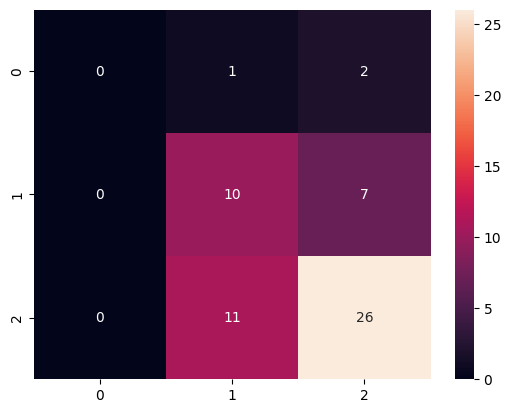

In [56]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         3
        malo       0.45      0.59      0.51        17
     regular       0.74      0.70      0.72        37

    accuracy                           0.63        57
   macro avg       0.40      0.43      0.41        57
weighted avg       0.62      0.63      0.62        57



In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

Precisión del clasificador Bayes Ingenuo: 0.7894736842105263


<Axes: >

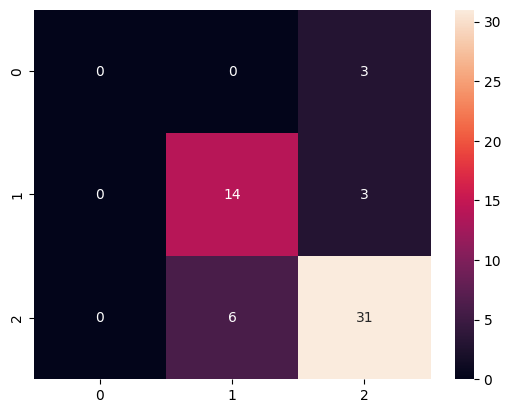

In [59]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         3
        malo       0.70      0.82      0.76        17
     regular       0.84      0.84      0.84        37

    accuracy                           0.79        57
   macro avg       0.51      0.55      0.53        57
weighted avg       0.75      0.79      0.77        57



### K-fold

In [61]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

       bueno       0.14      0.67      0.24         3
        malo       0.67      0.80      0.73         5
     regular       0.89      0.38      0.53        21

    accuracy                           0.48        29
   macro avg       0.57      0.62      0.50        29
weighted avg       0.77      0.48      0.54        29

Precisión del clasificador KNN: 0.4827586206896552
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         1
        malo       0.50      0.50      0.50        12
     regular       0.59      0.62      0.61        16

    accuracy                           0.55        29
   macro avg       0.36      0.38      0.37        29
weighted avg       0.53      0.55      0.54        29

Precisión del clasificador KNN: 0.5517241379310345
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         1
        malo       1.00    

In [62]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

113 29
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         3
        malo       0.60      0.60      0.60         5
     regular       0.79      0.90      0.84        21

    accuracy                           0.76        29
   macro avg       0.46      0.50      0.48        29
weighted avg       0.68      0.76      0.71        29

Precisión del clasificador Bayes Ingenuo: 0.7586206896551724
113 29
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         1
        malo       0.56      0.75      0.64        12
     regular       0.69      0.56      0.62        16

    accuracy                           0.62        29
   macro avg       0.42      0.44      0.42        29
weighted avg       0.61      0.62      0.61        29

Precisión del clasificador Bayes Ingenuo: 0.6206896551724138
114 28
              precision    recall  f1-score   support

       bueno       0.00      0.00      0